In [1]:
%matplotlib inline
import torch
import torchvision # 计算机视觉常用的包
from torch.utils import data
from torchvision import transforms
import d2l_tools as d2l
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#使用svg格式在jupyter中显示绘图
d2l.use_svg_display()

读取数据集
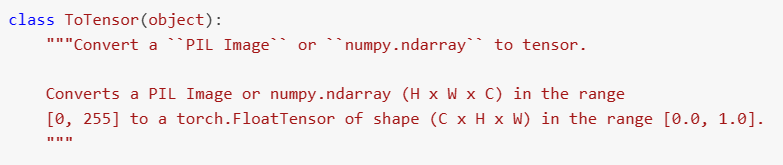

In [3]:
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
        root = "../data", train = True, transform = trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(
        root = "../data" , train = False, transform = trans, download = True)

In [4]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [5]:
# 训练集: 数据 + 标签
mnist_train, mnist_train[0][0].shape, mnist_train[0][1]

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ../data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 torch.Size([1, 28, 28]),
 9)

In [6]:
# 将数字索引与文本名称进行转换
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

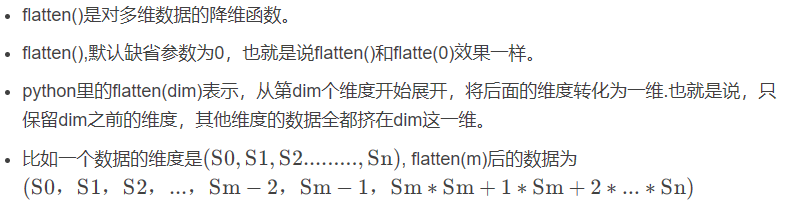

In [7]:
# 可视化样本
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    # 绘制图像列表
    figsize = (num_cols * scale, num_rows * scale)
    _,axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        
        else:
            ax.imshow(img)
        # 隐藏坐标轴
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

torch.Size([18, 1, 28, 28])


array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

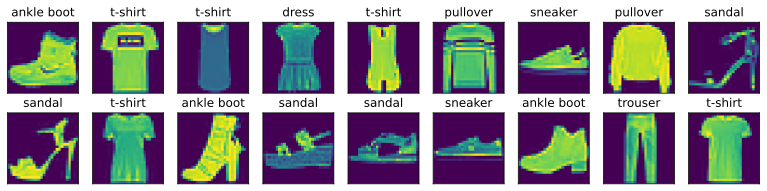

In [8]:
x, y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
print(x.shape)
show_images(x.reshape(18,28,28), 2, 9, titles=get_fashion_mnist_labels(y))

In [9]:
# 读取小批量
batch_size = 256

def get_dataloader_workers():
    # 使用4个线程读取数据
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers())

In [10]:
timer = d2l.Timer()
timer.start()
for x, y in train_iter:
    continue
timer.stop()

3.0119998455047607

In [11]:
# 整合所有组件(获取和读取Fashion-MNIST数据集)
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
        # 相当于 [transforms.Resize(resize),transforms.ToTensor()]
    # 将变换组合在一起
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root = "../data", train = True, transform = trans, download = True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root = "../data" , train = False, transform = trans, download = True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False, 
                             num_workers=get_dataloader_workers()))

In [12]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=[64,64])
for x, y in train_iter:
    print(x.shape, x.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


***练习***
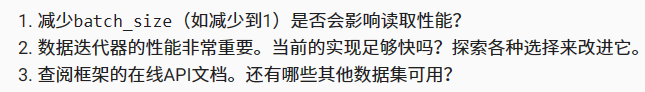

In [13]:
# QA1
batch_size = 1

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
timer.start()
for x, y in train_iter:
    continue
timer.stop()

# 可以看出，上面使用batch_size=256，用时3s； 此处batch_size=1，用时18s
# 减少batch_size 会影响读取性能 

18.098001956939697

In [14]:
# 可视化batch_size 与 读取时间关系图
batch_sizes = np.arange(1, 300, 10)

timer = d2l.Timer()

for batch_size in batch_sizes:
    train_iter = data.DataLoader(mnist_train, int(batch_size), shuffle=True, 
                             num_workers=get_dataloader_workers())
    timer.start()
    for x, y in train_iter:
        continue
    timer.stop()

timer

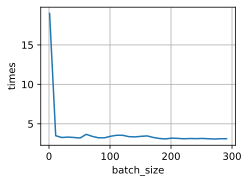

In [15]:
d2l.plot(batch_sizes, timer.times, 'batch_size', 'times')

In [16]:
# QA2
# 可视化 线程数量和时长 关系
batch_size = 256

timer = d2l.Timer()
num_workers = np.arange(0, 8, 1)

for num_worker in num_workers:
    train_iter = data.DataLoader(mnist_train, int(batch_size), shuffle=True, 
                             num_workers=num_worker)
    timer.start()
    for x, y in train_iter:
        continue
    timer.stop()

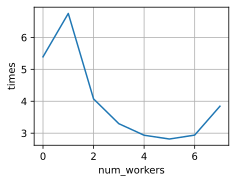

In [17]:
d2l.plot(num_workers, timer.times, 'num_workers', 'times')

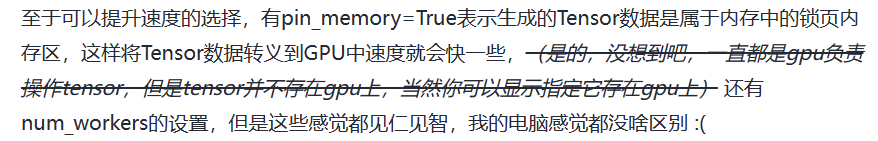

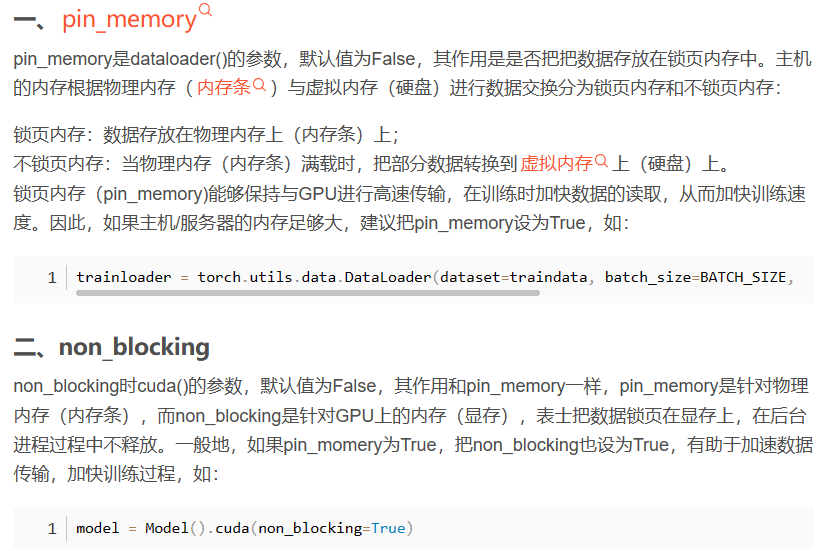

QA3
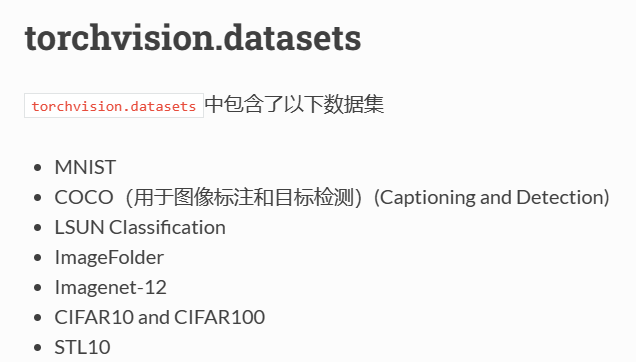